In [ ]:
#Задание 1
#Импортируйте библиотеки pandas и numpy.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, 
#чтобы размер тестовой выборки
#составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
#Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
#Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
#Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [278]:
import numpy as np
import pandas as pd 

In [279]:
from sklearn.datasets import load_boston as lb

In [280]:
a = lb()

In [281]:
a.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [282]:
data = a.data
target = a.target
feature_names = a.feature_names
DESCR = a.DESCR
filename = a.filename

In [283]:
x = pd.DataFrame(data, columns = feature_names)
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [284]:
y = pd.DataFrame(target, columns = ['1'])
y.head(10)
#y.mean()
#y.median()

,1
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [285]:
from sklearn.model_selection import train_test_split as tts

In [286]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 42)

In [287]:
from sklearn.linear_model import LinearRegression as L

In [288]:
lr = L()

In [289]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
M = pd.DataFrame({'pred': y_pred.flatten(),
                'test': y_test["1"]}) 
M

,pred,test
173,28.648960,23.6
274,36.495014,32.4
491,15.411193,13.6
72,25.403213,22.8
452,18.855280,16.1
...,...,...
441,17.403672,17.1
23,13.385941,14.5
225,39.983425,50.0
433,16.682863,14.3


<function matplotlib.pyplot.show(close=None, block=None)>

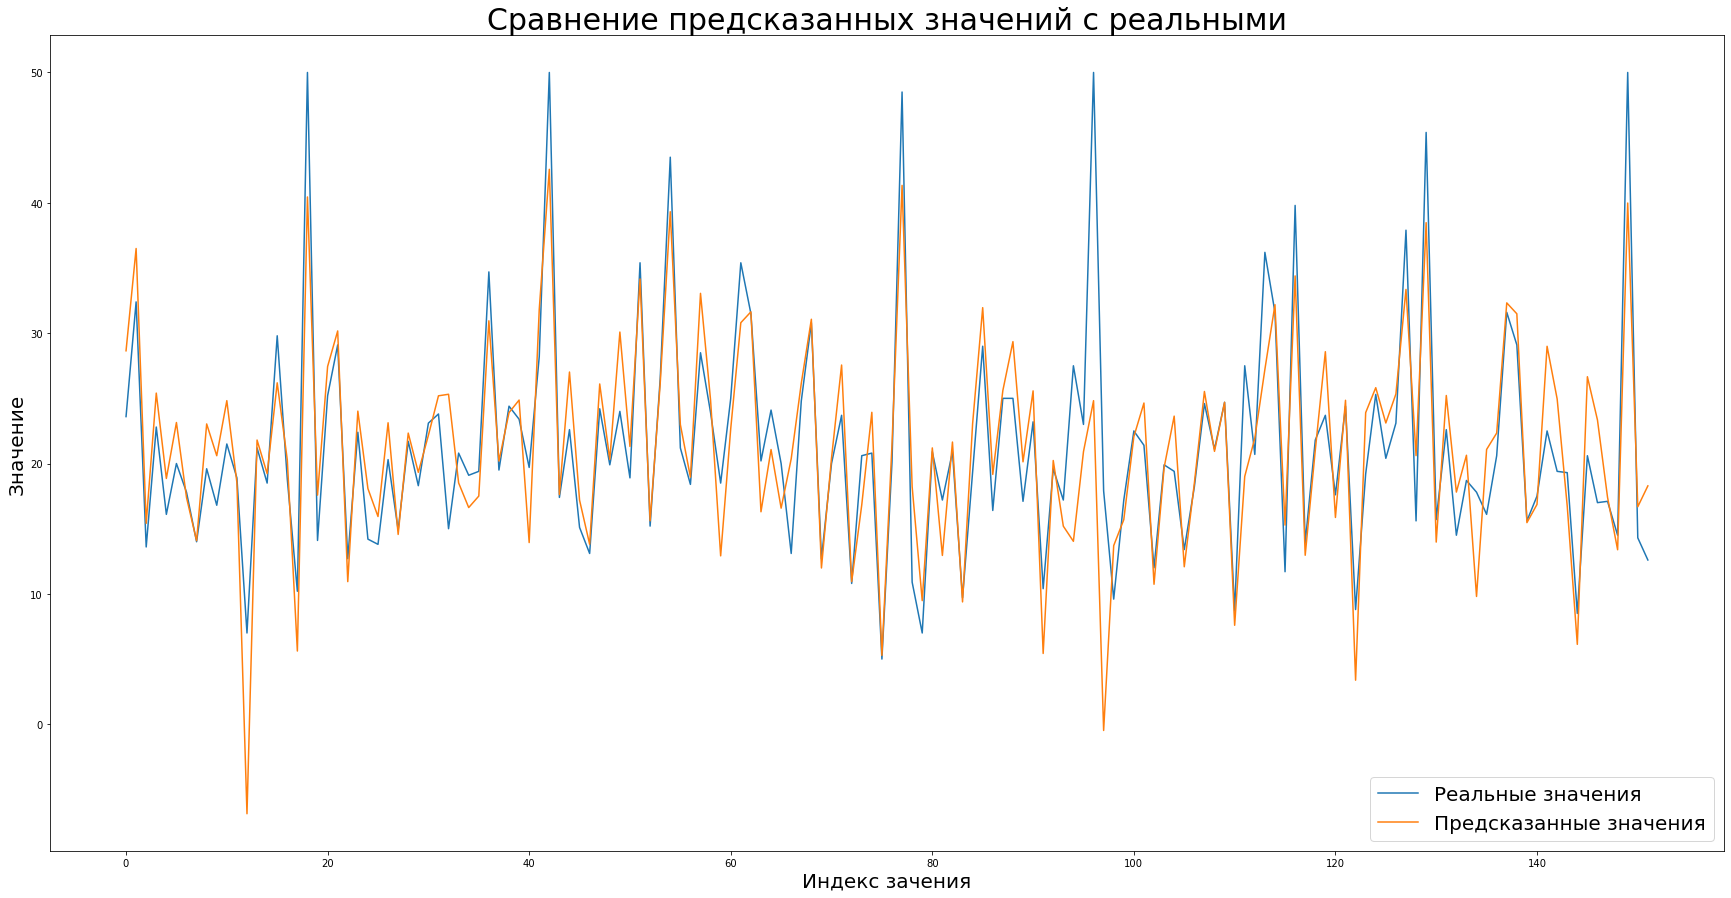

In [292]:
from matplotlib import pyplot as plt
#y_predx = pd.DataFrame(y_pred, columns = 'qwer')
#type(y_pred)
y_predx = y_pred.flatten()
#type(y_predx)
#v = pd.DataFrame({'qwer': y_test["1"],
#                 'qwer1': y_predx})
y_testa = np.array(y_test)
plt.figure(figsize = (30,15))
plt.plot(y_testa, label = 'Реальные значения')
plt.plot(y_pred, label = 'Предсказанные значения')
plt.title('Сравнение предсказанных значений с реальными', fontsize = 30)
plt.xlabel('Индекс зачения', fontsize = 20)
plt.ylabel('Значение', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show

In [294]:
from sklearn.metrics import r2_score as r2
R2 = r2(y_testa, y_pred)
R2

0.7112260057484973

In [295]:
#Задание 2
#Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
#Сделайте агрумент n_estimators равным 1000,
#max_depth должен быть равен 12 и random_state сделайте равным 42.
#Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
#но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
#чтобы получить из датафрейма одномерный массив Numpy,
#так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
#Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
#Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [296]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [297]:
model.n_estimators = 1000
model.max_depth = 12
model.random_state = 42

In [299]:
x_train1, x_test1, y_train1, y_test1 = tts(x, y, test_size=0.25, random_state = 100)

In [300]:
lr1 = L()

In [301]:
lr1.fit(x_train1, y_train1.values[:, 0])

LinearRegression()

In [302]:
n1 = lr1.predict(x_test1)
n2 = np.array(y_test1.values[:, 0])
#n1.shape
#n2.shape
n3 = pd.DataFrame({'pred':n1, 'test':n2})
n3

,pred,test
0,34.325609,34.6
1,31.263351,31.5
2,22.280033,20.6
3,17.869751,14.5
4,20.406069,16.2
...,...,...
122,20.665192,21.8
123,24.692270,23.1
124,21.174351,20.1
125,15.798677,13.4


<function matplotlib.pyplot.show(close=None, block=None)>

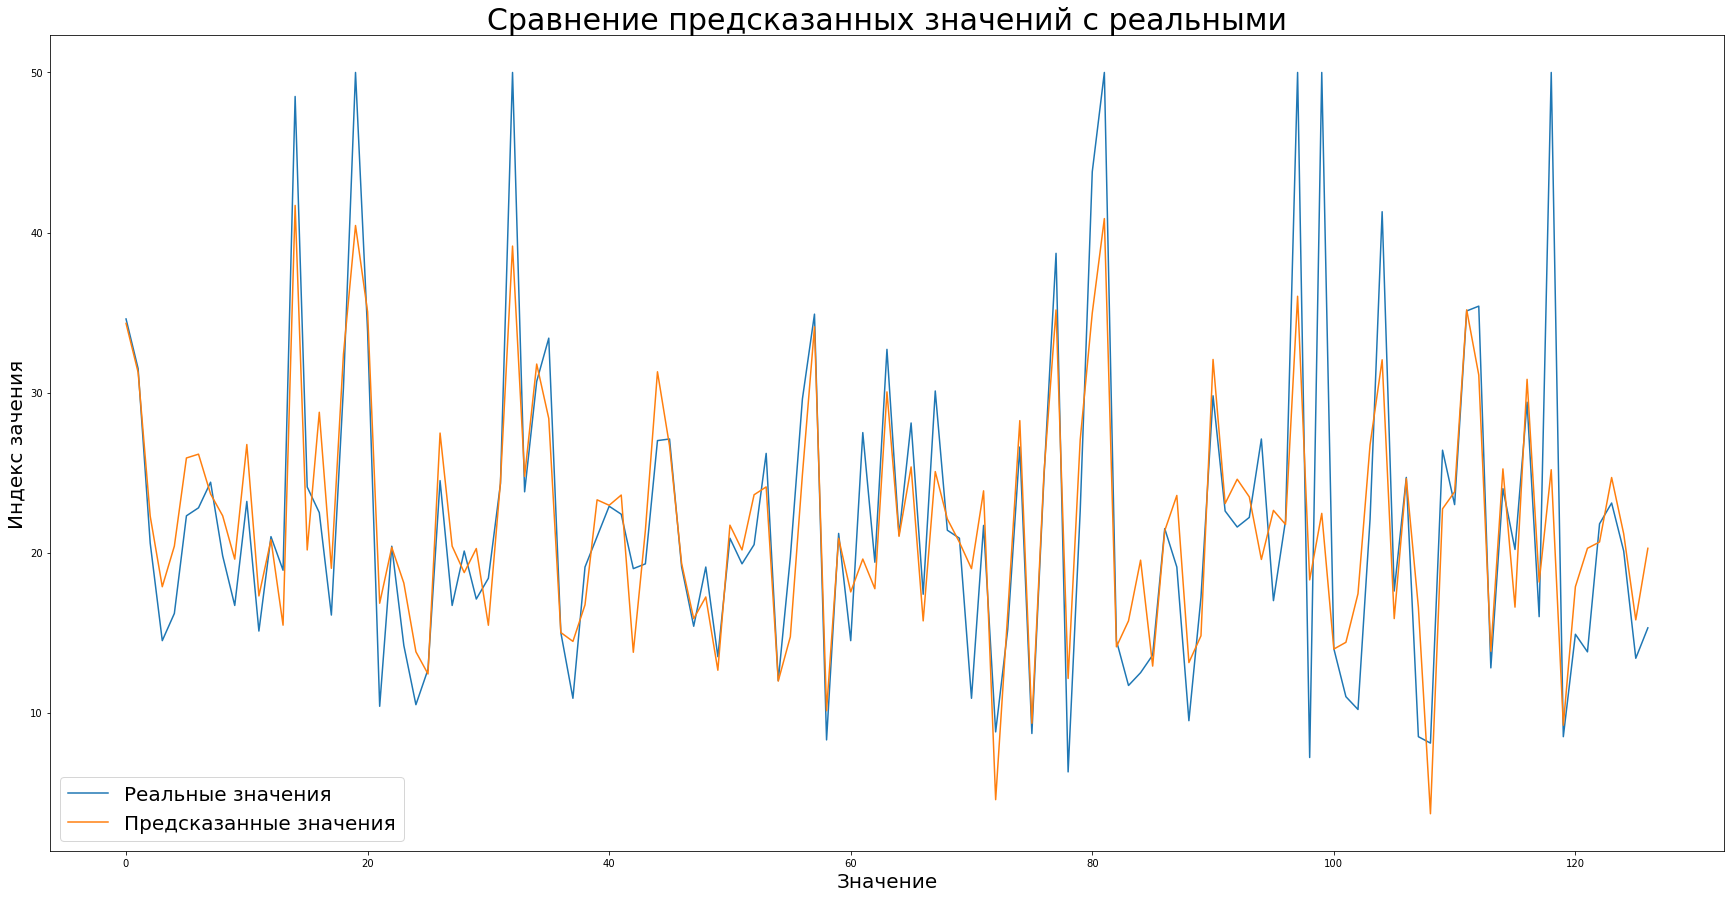

In [303]:
plt.figure(figsize = (30,15))
plt.plot(n2, label = 'Реальные значения')
plt.plot(n1, label = 'Предсказанные значения')
plt.title('Сравнение предсказанных значений с реальными', fontsize = 30)
plt.xlabel('Значение', fontsize = 20)
plt.ylabel('Индекс зачения', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show

In [304]:
R2_1 = r2(n1, n2)
R2_1

0.4847570735541442

In [305]:
print("В первом задании R2 =", R2)
print("Во втором задании R2 =", R2_1)
print(R2, "Значительно ближе к 1, следовательно первая модель работает лучше")

В первом задании R2 = 0.7112260057484973
Во втором задании R2 = 0.4847570735541442
0.7112260057484973 Значительно ближе к 1, следовательно первая модель работает лучше
